<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用-jieba-库做词频统计并可视化" data-toc-modified-id="使用-jieba-库做词频统计并可视化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用 jieba 库做词频统计并可视化</a></span></li><li><span><a href="#其他" data-toc-modified-id="其他-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>其他</a></span></li></ul></div>

## 使用 jieba 库做词频统计并可视化

使用`re`库正则表达式对数据预处理：去除空白字符、双引号、单引号等等；<br><br>
使用`jieba`库对数据进行切割；<br><br>
使用`wordcloud`库生成词云；<br><br>
使用`collections`统计词频；<br><br>
使用`PIL`对词云进行处理；<br><br>
使用`matplotlib`显示词云。

自己 43
技术 22
限制 18
能力 15
但是 15
做 15
公司 14
维度 14
什么 14
和 13


(-0.5, 1023.5, 681.5, -0.5)

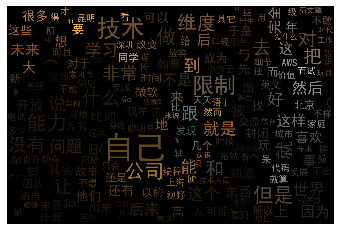

In [21]:
# 导入库
import re  # 正则表达式库
import collections  # 词频统计库
import numpy as np  # numpy库
import jieba  # 结巴分词
import wordcloud  # 词云展示库
from PIL import Image  # 图像处理库
import matplotlib.pyplot as plt  # 图像展示库

# 读取文本文件
with open('./别让自己“墙”了自己.txt', encoding='utf-8') as fn:
    string_data = fn.read()  # 使用read方法读取整段文本

# 使用正则表达式对文本预处理
pattern = re.compile(u'\s|\.|-|一|:|;|\)|\(|\?|"')  # 建立正则表达式匹配模式
string_data = re.sub(pattern, '', string_data)  # 将符合模式的字符串替换掉

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False)  # 精确模式分词[默认模式]
with open('./stopwords-master/四川大学机器智能实验室停用词库.txt', encoding="utf-8") as stop_words:
    stop_words = stop_words.read()

# stop_words = [] #空去除词列表，用于跟关键字提取做效果对比

# 将不在去除词列表中的词添加到列表中
object_list = [i for i in seg_list_exact if i not in remove_words]

# 词频统计
word_counts = collections.Counter(object_list)  # 对分词做词频统计
word_counts_top10 = word_counts.most_common(10)  # 获取前10个频率最高的词
for w, c in word_counts_top10:  # 分别读出每条词和出现从次数
    print(w, c)  # 打印输出

# 词频可视化
mask = np.array(Image.open('wordcloud.jpg'))  # 定义词频背景
wc = wordcloud.WordCloud(  # 词云设置
    font_path='C:/Windows/Fonts/simhei.ttf',  # 设置字体格式，不设置将无法显示中文
    mask=mask,  # 设置背景图
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
)
wc.generate_from_frequencies(word_counts)  # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask)  # 从背景图建立颜色方案
wc.recolor(color_func=image_colors)  # 将词云颜色设置为背景图方案
plt.imshow(wc)  # 显示词云
plt.axis('off')  # 关闭坐标轴

## 其他
中文常用停用词表（哈工大停用词表、百度停用词表等）：[goto456/stopwords: 中文常用停用词表（哈工大停用词表、百度停用词表等）](https://github.com/goto456/stopwords)

结巴分词：[fxsjy/jieba: 结巴中文分词](https://github.com/fxsjy/jieba)<br>

别让自己“墙”了自己：[别让自己"墙"了自己 | | 酷 壳 - CoolShell](https://coolshell.cn/articles/20276.html)